### 과일 이미지 분류 문제
- 세 종류(사과, 파인애플, 바나나)의 과일 이미지 300장이 있다
- 각 이미지에 라벨링은 되어 있지 않으며(비지도 학습)
    - 목적은 과일을 종류별로 분리(군집화)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# pyplot의 imshow( cmap=출력 색상 정보)함수가 이미지 출력

### 이미지 데이터
- 디지털 데이터이므로 수치화 되어 있음
- 흑백/칼라
    - 흑백(그레이스케일) : 명도를 통해 이미지 윤곽을 결정(0~255)
    - 칼라 : RGB 등 색을 표현하는 여러 수치로 되어 있음(차원이 흑백에 비해 높다)

In [2]:
# 데이터 확인 npy 데이터는 numpy 전용 데이터
# numpy.load() 이용
fruits = np.load('./data/fruits_300.npy')

In [4]:
fruits.shape

# 높이 100, 넓이 100인 이미지 300장

(300, 100, 100)

In [3]:
#첫번째 이미지 데이터
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

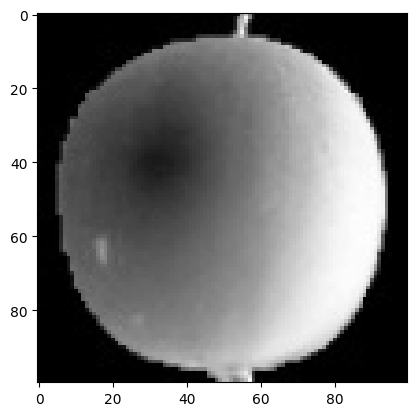

In [5]:
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

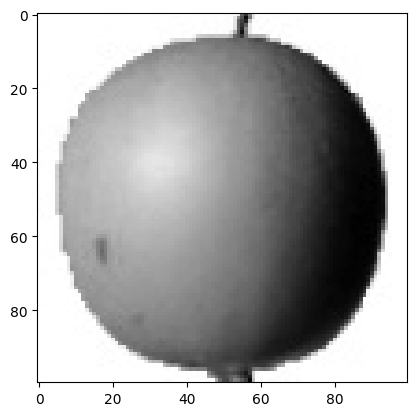

In [6]:
 # 반전시켜서 확인
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

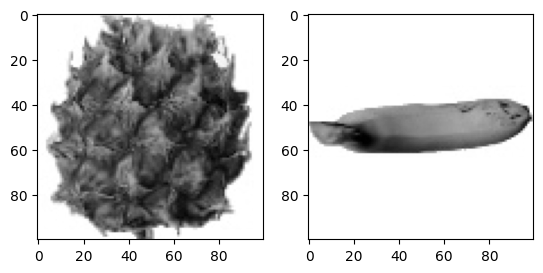

In [7]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[150], cmap = 'gray_r')
axs[1].imshow(fruits[250], cmap = 'gray_r')

## 군집화
- 현재 데이터의 피처를 활용
- 현 이미지를 예로 들면 이미지 한개당 피처는 0-255 사이의 값들이 여러개 존재
    - 각 이미지의 피처 값들의 평균을 내고 평균값이 비슷한 것들끼리 묶는다?

#### 픽셀값 분석하기
- 각 이미지의 픽셀값의 평균을 내려면 차원이 줄어야 함
    - width * height 로 되어있는 차원을 일차원으로 변경해서 각 이미지의 픽셀 평균

In [8]:
apple = fruits[0:100].reshape(-1, 100*100)
apple ## 각각의 이미지를 1차원 배열로 생성
apple.shape # 100개의 사과 이미지 10000개의 픽셀 특성

(100, 10000)

In [15]:
pineapple = fruits[100:200].reshape(-1, 100*100)
pineapple
pineapple.shape

(100, 10000)

In [16]:
banana = fruits[200:300].reshape(-1, 100*100)
banana
banana.shape

(100, 10000)

In [9]:
import pandas as pd
test_df = pd.DataFrame(apple)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
# 100개의 사과 이미지 픽셀 평균
test_df.mean(axis=1)

0      88.3346
1      97.9249
2      87.3709
3      98.3703
4      92.8705
        ...   
95    100.7823
96    101.5560
97    100.7027
98     91.6098
99     88.8976
Length: 100, dtype: float64

In [11]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [17]:
print(banana.mean(axis=1))

[19.5487 24.4884 36.7517 18.568  53.572  31.5789 51.9062 28.4703 23.7856
 32.1295 29.1737 24.5578 27.7676 41.3082 61.0437 32.6444 38.4187 30.4175
 30.0639 21.4994 32.6018 39.6335 47.8397 57.7484 33.6511 23.5018 49.6817
 44.0855 46.1559 33.4963 36.0099 69.0751 33.9575 32.8786 60.1911 32.9949
 45.3359 56.1694 36.9218 25.6754 32.7901 29.0245 57.7134 44.6563 31.2138
 29.836  40.9228 23.7501 43.1543 32.3716 26.0986 55.6189 22.2269 29.5089
 24.0435 22.6247 24.1709 46.2714 32.0763 42.5076 44.5522 24.0199 27.68
 32.4377 19.2198 22.5083 19.6742 26.1852 25.8368 25.2676 26.4721 34.8503
 28.5235 80.8545 36.9371 47.3975 18.7909 33.0428 37.8222 34.7819 33.6051
 24.3963 32.7988 19.7609 32.538  28.5407 23.0999 26.3778 27.1965 38.7848
 18.7648 30.2297 54.3816 37.9073 32.3126 31.0664 33.1657 37.6051 38.1806
 26.2805]


In [18]:
print(pineapple.mean(axis=1))

[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96.9487  93.2863 101.2771  91.6511  98.3901  84.3277 100.7017
  99.0229  87.5298  99.4109  91.8568  90.3877  99.5066  95.8498  96.0728
 100.0062  95.5283  95.2715  98.1624  93.1395  99.1666  99.9519  96.732
  94.16   100.7644 101.1263  98.2852  98.5354 101.3809  95.4862  93.1256
  87.6404  93.7146  94.7279  85.5131  95.0937  95.3236  92.7696  94.4375
  99.36    95.8924  97.8221  99.4014  99.325   95.025   97.5771  97.3511
  99.4891  97.366  101.0062  91.2304  95.2824  95.3544 101.4657  97.5239
  98.8419  96.746   98.2922  96.3969  81.9464  93.4927  97.3872  82.4883
  95.3665  95.2541 101.3074  97.2391  95.4544 100.5576 100.2927  94.3088
  95.7401  97.0982  96.9559  92.9114  97.4164 100.769   97.808   99.2481
 101.0643  94.8173  99.2639  98.8539  97.2198  97.0201  94.5039  98.097
  95.0201  98.8078  99.4634 100.0257]


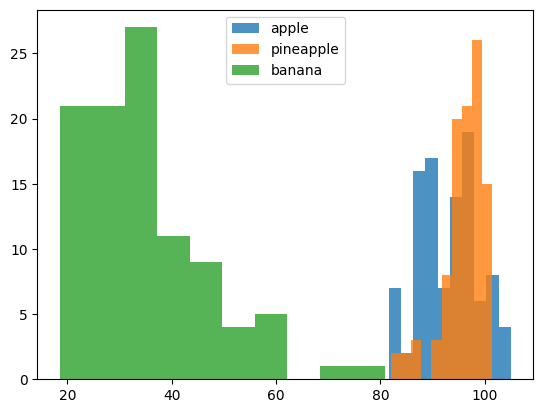

In [19]:
# 세개의 과일에 대한 픽셀평균의 분포 확인
# 히스토그램이용
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

#### 히스토그램 분석
- 바나나는 픽셀의 평균만으로도 조건을 설정할 수 있음(평균값이 80미만)
- 사과와 파인애플은 중복되는 평균값이 많아서 구분이 불가함
- 각 이미지별 픽셀의 평균대신 특성의 평균을 사용해보자?
    - 10000개의 특성이 있음. 같은 특성들끼리의 평균

In [20]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
test_df.mean(axis=0)

0       1.01
1       1.01
2       1.01
3       1.01
4       1.00
        ... 
9995    1.00
9996    1.00
9997    1.00
9998    1.00
9999    1.00
Length: 10000, dtype: float64

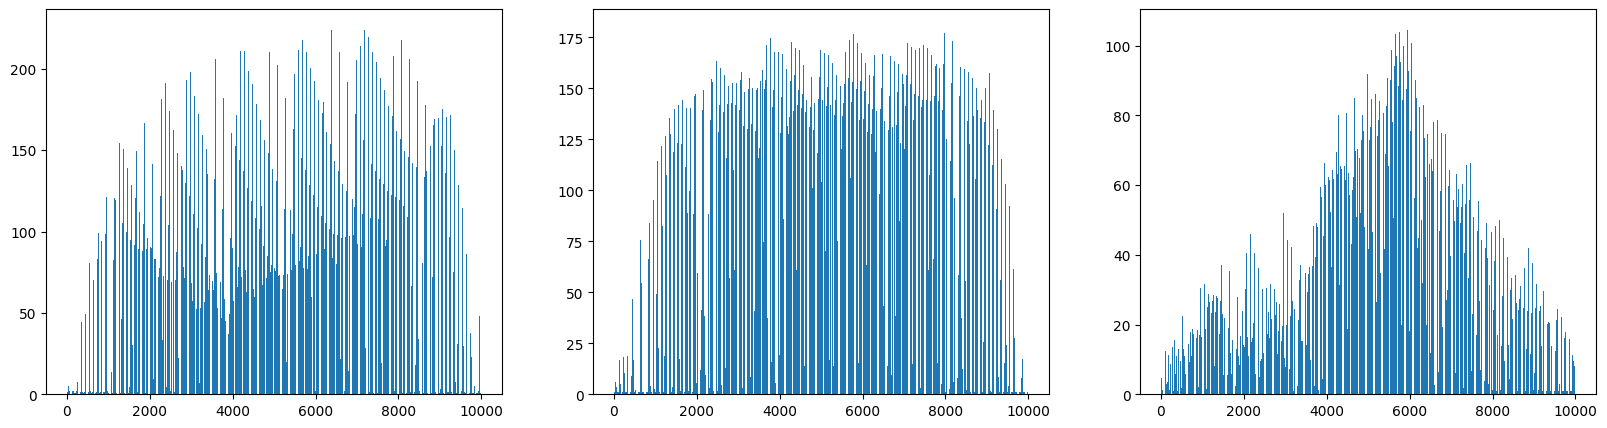

In [22]:
# 각 과일별 특성의 평균을 이용해 bar 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

### 그래프 설명
- 파인애플과 바나나는 비교적 고르면서 높게 나타나고 있고
- 사과는 아래쪽으로 갈수록 값이 높아짐
- 특성의 평균 그래프가 이미지의 평균 그래프보다 구분이 쉽기때문에 특성의 평균을 선택

In [30]:
# 특성들의 평균값을 이용해 대표 이미지로 결정
 # 2차원 이미지 형태로 변환
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
apple_mean
pineapple_mean
banana_mean

array([[1.1 , 1.07, 1.1 , ..., 1.04, 1.01, 1.05],
       [1.12, 1.03, 1.04, ..., 1.  , 1.01, 1.  ],
       [1.06, 1.02, 1.02, ..., 1.  , 1.05, 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [31]:
apple_mean.shape

(100, 100)

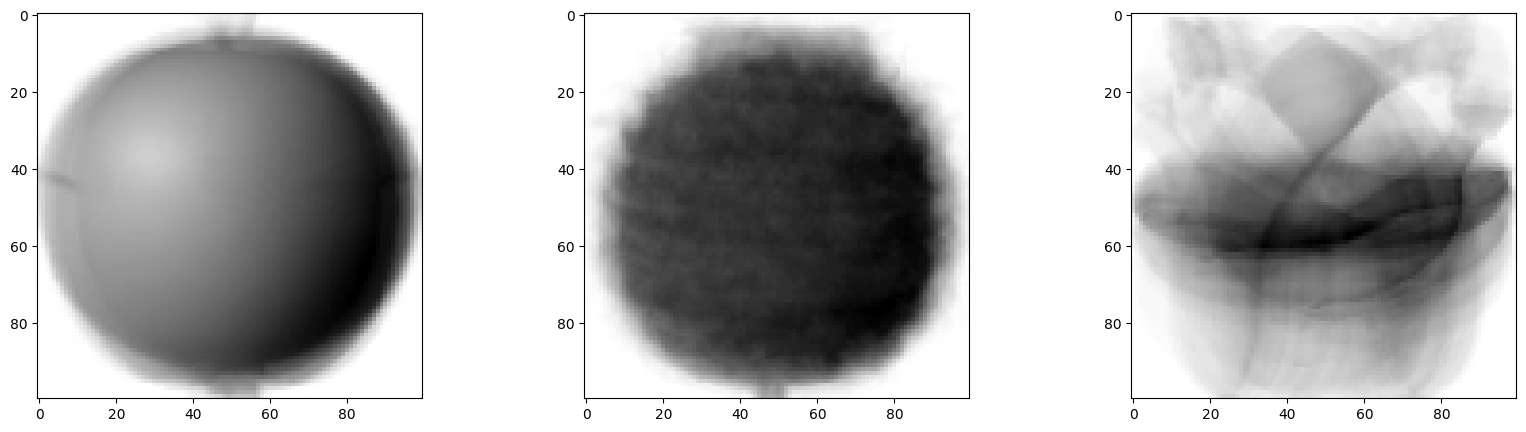

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 대표이미지(특성의 평균으로 계산된)와 가까운 이미지 선택
- 거리 계산 후 군집 분류

In [33]:
# 원 이미지와 사과 평균 이미지의 차이(거리)계산(픽셀별 계산)
abs_diff = np.abs(fruits - apple_mean)

In [34]:
# abs_dff (사과 평균과의 차이 이미지)의 평균을 구함(각 이미지별 평균(행평균))
abs_diff

array([[[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       ...,

       [[0.01, 0.01, 0.0

In [36]:
abs_mean = np.mean(abs_diff, axis(1,2))
print(abs_mean) # 사과 대표 이미지와의 차이 평균


NameError: name 'axis' is not defined

In [35]:
print(abs_mean) # 사과 대표이미지와의 차이 평균
# 이 결과에서 정렬 후 차이가 적게 나는 100개의 이미지 인덱스를 확인

NameError: name 'abs_mean' is not defined

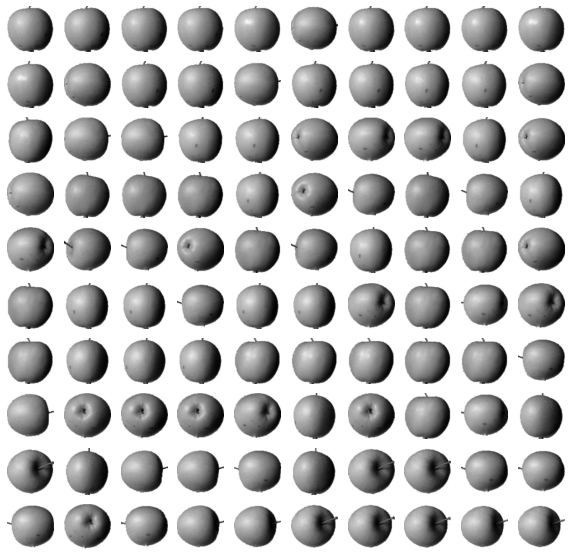

In [36]:
# 사과와 평균거리가 가까운 100개 이미지의 인덱스

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

## 개인 실습
- 파인애플과 바나나 대표 이미지에 대해서도 차이(거리)계산 후 
- 바나나 대표이미지와 가까운 이미지 출력
- 파인애플 대표 이미지와 가까운 이미지 출력

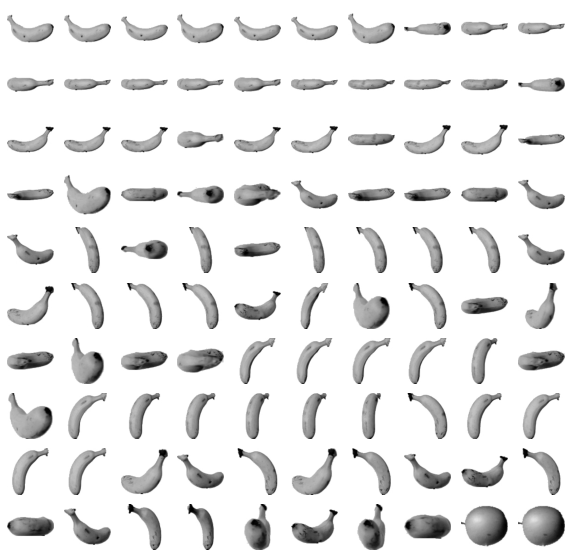

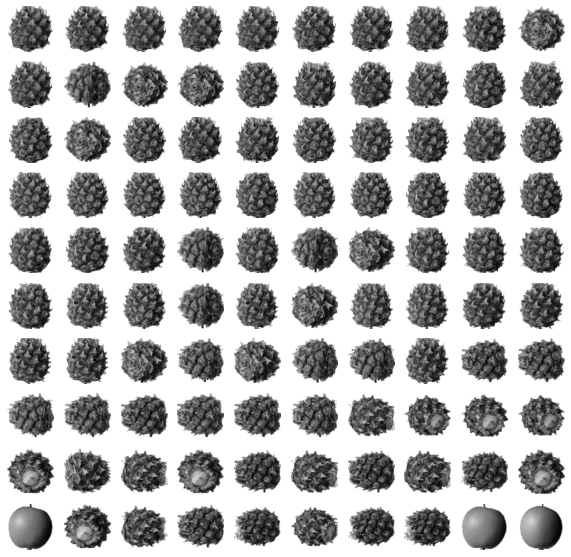